# Figure that shows alternative posterior predictive checks of the integrated method for CD4 data

* Timeseries of interplotated UMAPs are in the main figure (see notebook `FigureIAClusFitValiCD4.ipynb`)
* Here we show the marginal distributions of the marker expression and predicted vs. data, $R^2$ plots

In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pickle
import json
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib

import scdynsys.plots as plots
import scdynsys.utilities as utils

tex_fonts = {
    "font.family" : "Helvetica",
    'pdf.fonttype' : 42,
}

plt.rcParams.update(tex_fonts)

tabcolors =  [matplotlib.colors.to_hex(plt.cm.tab20(i/20)) for i in range(20)]
tabcolors = [tabcolors[2*i] for i in range(10)] + [tabcolors[2*i+1] for i in range(10)]

## Import data

Data is generated in the notebook `IntegratedApproachCD4.ipynb`

In [2]:
data_file = "../results/data_IA_validation_CD4.pkl"

with open(data_file, 'rb') as f:
    data_dict = pickle.load(f)
    
# unpack

idxs_mix = data_dict["idxs_mix"]
flat_umap_samples = data_dict["flat_umap_samples"]
umap_samples_sim = data_dict["umap_samples_sim"]
umap_samples_data = data_dict["umap_samples_data"]
densities_per_frame_sim = data_dict["densities_per_frame_sim"]
densities_per_frame_data = data_dict["densities_per_frame_data"]
clus_sorted_by_size = data_dict["clus_sorted_by_size"]
transformed_samples_per_clus = data_dict["transformed_samples_per_clus"]
marker_expression_sim = data_dict["marker_expression_sim"]
marker_expression_data = data_dict["marker_expression_data"]
raw_data = data_dict["raw_data"]
raw_recon = data_dict["raw_recon"]
R2s_recon = data_dict["R2s_recon"]
sel_markers = data_dict["sel_markers"]
unique_samping_day = data_dict["unique_sampling_day"]


## Create the figure

panels are added below

In [3]:
hsize = 14
hnum = 8
vnum = 3
axmul = 3

fig = plt.figure(figsize=(hsize, vnum * hsize / hnum))

gs = GridSpec(vnum*axmul-1, hnum*axmul)

labx, laby = -0.07, 1.05

fig.subplots_adjust(wspace=0.1, hspace=0.1)

<Figure size 1400x525 with 0 Axes>

## Plot marginal distributions of the markers together with data


In [4]:

ax = fig.add_subplot(gs[:, :4*axmul-1])

num_markers = len(sel_markers)
num_days = len(unique_samping_day)

xscale = 1/num_markers
yscale = 1/num_days

for i, m in enumerate(sel_markers):
    xoffset = i / num_markers
    ax.axvline(xoffset, color='k', lw=1)
    Xs_all = np.concatenate([x[:,i] for x in marker_expression_data])
    xmin, xmax = np.percentile(Xs_all, q=[0, 100])
    xs = np.linspace(xmin, xmax, 100)
    sxs = (xs - xs[0]) / (xs[-1] - xs[0])
    for j, d in enumerate(unique_samping_day):
        yoffset = 1 - (j+1) / num_days
        if i == 0:
            ax.axhline(yoffset, color='k', lw=1)
        # plot data
        xs_data = marker_expression_data[j][:,i]
        zs_data = sts.gaussian_kde(xs_data)(xs)

        szs = 0.9 * zs_data / np.max(zs_data)
        txs, tzs = xoffset+sxs*xscale, yoffset+szs*yscale
        ax.plot(txs, tzs, color='k')
        ax.fill_between(txs, yoffset, tzs, color='0.8')
    
        # plot simulation
        xs_sim = marker_expression_sim[j][:,i]
        zs_sim = sts.gaussian_kde(xs_sim)(xs)
        szs = 0.9 * zs_sim / np.max(zs_sim)
        txs, tzs = xoffset+sxs*xscale, yoffset+szs*yscale
        ax.plot(txs, tzs, color='r')
        ax.fill_between(txs, yoffset, tzs, color='r', alpha=0.3)

    ax.text(xoffset + xscale/2, 1, m, va='bottom', ha='center')    

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
yticks = np.linspace(0, 1, num_days+1)[:-1] + 0.5/num_days
ax.set_yticks(yticks)
ax.set_yticklabels([f"{x:0.0f} DPI" for x in reversed(unique_samping_day)])

ax.set_ylabel("Density")
ax.set_xlabel("Fluorescence")

xlab_coord = -0.1
ax.xaxis.set_label_coords(0.5, xlab_coord)


# label
ax.text(labx, laby, "A", fontsize='xx-large', transform=ax.transAxes)

Text(-0.07, 1.05, 'A')

## Plot autoencoder reconstructions


In [5]:

Ax = fig.add_subplot(gs[:, 4*axmul+1:])
plots.remove_axes_keep_labels(Ax)
Ax.set_xlabel("Input data")
Ax.set_ylabel("Reconstructed data")

ylab_coord = -0.07
Ax.xaxis.set_label_coords(0.5, xlab_coord)
Ax.yaxis.set_label_coords(ylab_coord, 0.5)

axs_recon = []

hstart = 4*axmul+1

for i, m in enumerate(sel_markers):
    a, b = divmod(i, 4)
    aa = a*axmul
    bb = hstart + b*axmul
    ax = fig.add_subplot(gs[aa:aa+2, bb:bb+2])
    
    ax.scatter(raw_data[:,i], raw_recon[:,i], s=1, linewidths=0, color='k', 
               rasterized=True)
    R2 = R2s_recon[i]
    ax.set_title(f"{m} (${R2:0.2f}$)")

# label
Ax.text(labx, laby, "B", fontsize='xx-large', transform=Ax.transAxes)


Text(-0.07, 1.05, 'B')

## Show the figure

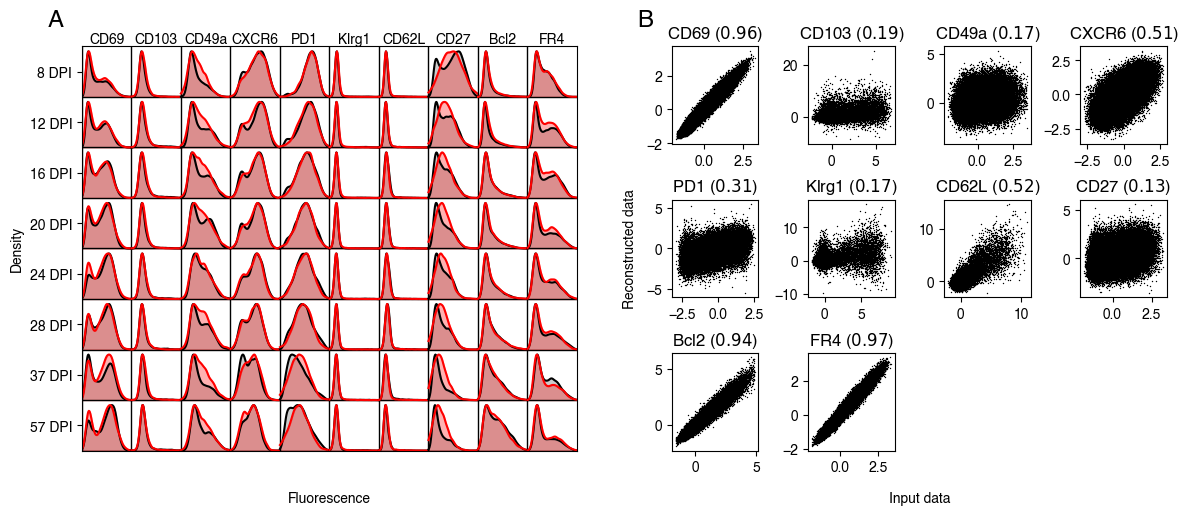

In [6]:
fig

In [7]:
#fig.savefig("../results/FigureIAValiCD4.pdf", bbox_inches='tight', dpi=200)